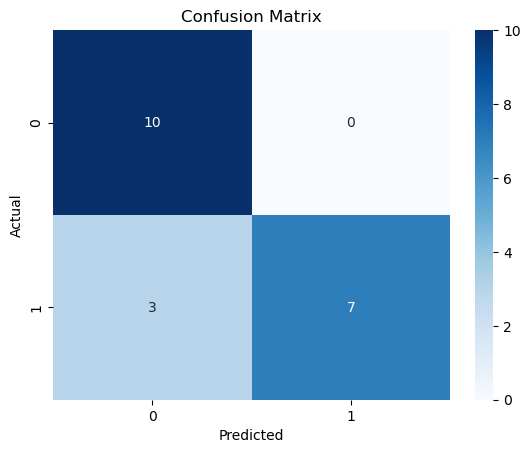

F1 Score: 0.8235294117647058
AUC-ROC Score: 1.0


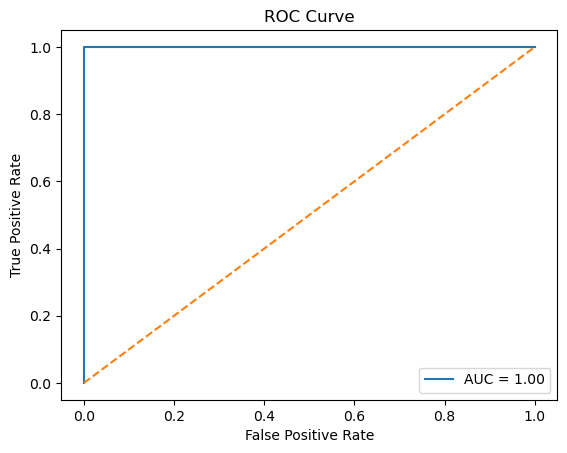

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


np.random.seed(42)
X = np.random.rand(100, 2)  
y = (X[:, 0] + X[:, 1] > 1).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  


cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")


roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {roc_auc}")


fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
